# Problem Statement



**Sentiment Analysis**

Binary classification (positive vs negative sentiment) of movie reviews.

Techinques:

    Classical machine learning techniques (Naive Bayes, Logistic Regression)
    Deep learning techniques (Recurrent Neural Networks, Embeddings)

Learning Type:

    supervised learning - using labelled dataset
        data => model (based on patterns)
        training vs validation vs test
    unsupervised learning

Evaluation:

    accuracy - on test set (correcly predicted number / total number)
    false positives / false negatives



# Dataset

Huggingface
- [huggingface Hub](https://huggingface.co/docs/datasets/index) - contains lots of open source models and dataset
- huggingface [DataViewer WebApp](https://huggingface.co/datasets/viewer/) - to browse and explore dataset
- huggingface [datasets v2](https://huggingface.co/docs/datasets/installation) - documentation
- huggingface [datasets v1](https://huggingface.co/docs/datasets/v1.11.0/loading_datasets.html) - documentation

In [145]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
import datasets
datasets.__version__

'2.7.0'

In [147]:
all_datasets = datasets.list_datasets()
print(f'Total number of datasets of huggingface hub: {len(all_datasets)}')
print(f'First ten datasets: {all_datasets[:10]}')

Total number of datasets of huggingface hub: 14209
First ten datasets: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [148]:
datasets_containing_imdb = [ds for ds in all_datasets if "imdb" in ds]
print(len(datasets_containing_imdb))
datasets_containing_imdb

57


['imdb',
 'imdb_urdu_reviews',
 'Lucylulu/imdb',
 'Recognai/imdb_spacy-ner',
 'SetFit/imdb',
 'abhishek/autonlp-data-imdb_eval',
 'rubrix/imdb_spacy-ner',
 'victor/autonlp-data-imdb-reviews-sentiment',
 'w11wo/imdb-javanese',
 'yxchar/imdb-tlm',
 'zapsdcn/imdb',
 'Kaveh8/movieimdbrating',
 'artemis13fowl/imdb',
 'Lumos/imdb_test',
 'Meena/imdb_ratings_table',
 'mathigatti/spanish_imdb_synopsis',
 'iamholmes/tiny-imdb',
 'mteb/imdb',
 'linxinyuan/imdb',
 'lewtun/imdb-dummy',
 'scikit-learn/imdb',
 'autoevaluate/autoeval-staging-eval-project-imdb-121fef16-9965322',
 'autoevaluate/autoeval-staging-eval-project-imdb-9ea92eb9-10585427',
 'autoevaluate/autoeval-staging-eval-project-imdb-bb79d3ef-10685437',
 'noob123/imdb10000',
 'noob123/imdb_train',
 'noob123/imdb_test',
 'autoevaluate/autoeval-staging-eval-project-imdb-a67e37bc-11105486',
 'autoevaluate/autoeval-staging-eval-project-imdb-a67e37bc-11105487',
 'autoevaluate/autoeval-staging-eval-project-imdb-a67e37bc-11105488',
 'autoevaluat

In [149]:
datasets.get_dataset_split_names("imdb")

['train', 'test', 'unsupervised']

In [150]:
from datasets import load_dataset
imdb_dataset = load_dataset("imdb")

  0%|          | 0/3 [00:00<?, ?it/s]

In [151]:
# DatasetDict similar to a Python dictionary - key : datasets
imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [152]:
# Dataset similar to a Python array - each element is a row of data (implementation is based on Apache Arrow tables, using a memory efficient columnar format)
imdb_dataset_train = imdb_dataset['train']
imdb_dataset_train

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [153]:
# Each row of data is represented as a dictionary
imdb_dataset['test'][0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [154]:
# text: string of review text
# label: ClassLabel neg/pos ~ 0,1
print(imdb_dataset_train.column_names)
print(imdb_dataset_train.features)

['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}


In [155]:
# Slicing work as for a regural Python array
print(imdb_dataset_train[:2])
print(imdb_dataset_train[:10]['label'])

{'text': ['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far b

## **Explore the dataset**



In [156]:
import pandas as pd


# change output format, does not change dataformat
imdb_dataset.set_format(type="pandas")

df = imdb_dataset['train'][:]
df.head()

,text,label
0,"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered ""controversial"" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain politica...",0
1,"""I Am Curious: Yellow"" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies li...",0
2,"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />",0
3,"This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instead.<br /><br />The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the dif...",0
4,"Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br /><br />""Is that all there is??"" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into ""Goodbye Columbus""). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br /><br />The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case spa...",0


In [157]:
imdb_dataset['train'].features['label'].int2str(0)

'neg'

In [158]:
imdb_dataset['train'].features['label'].str2int('pos')

1

In [159]:
def int2label_name(label):
  return imdb_dataset['train'].features['label'].int2str(label)

- [pandas DataFrame.apply documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [160]:
# Axis along which the function is applied:
#    0 or ‘index’: apply function to each column.
#    1 or ‘columns’: apply function to each row.  <--- this is what we want


df['label_name'] = df.apply(lambda row: int2label_name(row['label']), axis=1)
df.head()

,text,label,label_name
0,"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered ""controversial"" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain politica...",0,neg
1,"""I Am Curious: Yellow"" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies li...",0,neg
2,"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />",0,neg
3,"This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instead.<br /><br />The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the dif...",0,neg
4,"Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br /><br />""Is that all there is??"" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into ""Goodbye Columbus""). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br /><br />The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case spa...",0,neg


In [161]:
df[20000:20005]

,text,label,label_name
20000,"After reading some quite negative views for this movie, I was not sure whether I should fork out some money to rent it. However, it was a pleasant surprise. I haven't seen the original movie, but if its better than this, I'd be in heaven.<br /><br />Tom Cruise gives a strong performance as the seemingly unstable David, convincing me that he is more than a smile on legs (for only the third time in his career- the other examples were Magnolia and Born on the Fourth of July). Penelope Cruz is slightly lightweight but fills the demands for her role, as does Diaz. The only disappointment is the...",1,pos
20001,"This is one of those movies that's difficult to review without giving away the plot. Suffice to say there are weird things and unexpected twists going on, beyond the initial superficial ""Tom Cruise screws around with multiple women"" plot.<br /><br />The quality cast elevate this movie above the norm, and all the cast are well suited to their parts: Cruise as the irritatingly smug playboy who has it all - and then loses it all, Diaz as the attractive but slightly deranged jilted lover, Cruz as the exotic new girl on the scene and Russell as the fatherly psychologist. The story involves elem...",1,pos
20002,"Strangely, this version of OPEN YOUR EYES is more mature and more nuanced. Aided by hindsight, Crowe's screenplay is a lot tighter and more fleshed out than Amenabar's original. The Spanish filmmaker should get credit for thinking of the story first, but there's no doubt that Crowe has improved on it -- if just slightly. Notice that you have no idea what the lead did in OPEN YOUR EYES, but you know almost everything about the lead in VANILLA SKY. That's what i mean by more ""fleshed out.""",1,pos
20003,"I really liked this movie. I've read a few of the other comments, and although I pity those who did not understand it, I do agree with some of the criticisms. Which, in a strange way, makes me like this movie all the more. I accept that they have got a pretty cast to remake an intelligent movie for the general public, yet it has so many levels and is still great to watch. I also love the movies, such as this one, which provoke so many debates, theories, possible endings and hidden subtext. Congratulations Mr.Crowe, definitely in my Top Ten.<br /><br />P.S. Saw this when it first came out w...",1,pos
20004,"Despite excellent trailers for Vanilla Sky, I was expecting to be disappointed by the film because I'd heard that it did not get great reviews. However, I left the cinema completely in awe of how good Vanilla Sky is.<br /><br />There was no bad acting at all in the whole film, every single character is believable. The romantic moments between Cruise's character, David Aames and Cruz's character, Sophia are tear-jerkingly realistic and intimate (probably due to the fact that they were a soon-to-be real-life couple).<br /><br />The plot of Vanilla Sky will confuse you in the last third of th...",1,pos


In [162]:
df['label_name'].value_counts()

neg    12500
pos    12500
Name: label_name, dtype: int64

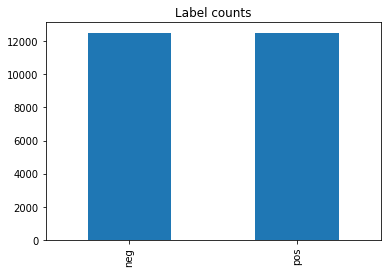

In [163]:
import matplotlib.pyplot as plt

df['label_name'].value_counts().plot.bar()
plt.title('Label counts')
plt.show()

In [164]:
df['text'][0]

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [165]:
type(df['text'][0])

str

In [166]:
print(df['text'][0].split()[:10])
print(len(df['text'][0].split()))

['I', 'rented', 'I', 'AM', 'CURIOUS-YELLOW', 'from', 'my', 'video', 'store', 'because']
288


In [167]:
df['words_per_review'] = df.apply(lambda row: len(row['text'].split()), axis=1)
df.head()

,text,label,label_name,words_per_review
0,"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered ""controversial"" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain politica...",0,neg,288
1,"""I Am Curious: Yellow"" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies li...",0,neg,214
2,"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />",0,neg,93
3,"This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instead.<br /><br />The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the dif...",0,neg,118
4,"Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br /><br />""Is that all there is??"" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into ""Goodbye Columbus""). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br /><br />The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case spa...",0,neg,311


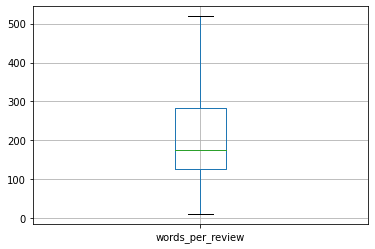

In [168]:
df.boxplot('words_per_review', showfliers=False)
plt.show()

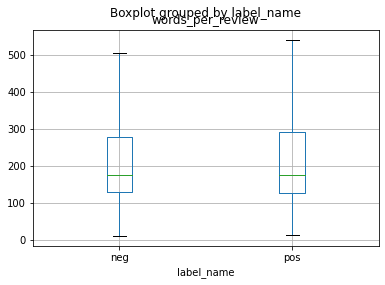

In [169]:
df.boxplot('words_per_review', by='label_name', showfliers=False)
plt.show()

In [170]:
df['words_per_review'].min()

10

In [171]:
df[(df['label_name']=='pos')]['words_per_review'].min()

12

In [172]:
df[(df['label_name']=='pos') & (df.index!=17069)]['words_per_review'].idxmin()

15022

In [173]:
df[17069:17070]['text']

17069    Adrian Pasdar is excellent is this film. He makes a fascinating woman.
Name: text, dtype: object

In [174]:
df.iloc[15022]

text                This is the definitive movie version of Hamlet. Branagh cuts nothing, but there are no wasted moments.
label                                                                                                                    1
label_name                                                                                                             pos
words_per_review                                                                                                        17
Name: 15022, dtype: object

In [175]:
# change back output format original
# imdb_dataset.reset_format()

## Tokenization

fast.ai

- [fastai v2 - documentation](https://docs.fast.ai/)
- [fastai v1 - documentaiton](https://fastai1.fast.ai/text.data.html#The-TextList-input-classes) - should not be used!


In [176]:
df_train_sample_neg = df = imdb_dataset['train'][0:2000]
df_train_sample_pos = df = imdb_dataset['train'][20000:22000]
df_train = pd.concat([df_train_sample_neg, df_train_sample_pos], axis=0)
df_train['is_valid']=False
df_train

,text,label,is_valid
0,"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered ""controversial"" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain politica...",0,False
1,"""I Am Curious: Yellow"" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies li...",0,False
2,"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />",0,False
3,"This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instead.<br /><br />The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the dif...",0,False
4,"Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br /><br />""Is that all there is??"" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into ""Goodbye Columbus""). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br /><br />The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case spa...",0,False
...,...,...,...
1995,"One of the most nihilistic and brutal films I've ever seen, but also one of the most tragic and moving ones. This is an action-melodrama like the world has never seen it before. Sometimes the plot got me close to tears, while in the next moment delivering shocking revelations like a bone-crunching blow to the guts. Chilling performance by Edison Chen. The story of a HK-Cop and a Cambodian killer hunting each other down, while bit by bit losing their humanity, is a strong one. Featuring very little dialog in favor of haunting imagery and gritty camera-work, ""Dog bite Dog"" is pure HK-Bloodsh...",1,False
1996,"It's remarkable and quite praiseworthy how writers and directors continue to make great movies out of one of the oldest and most (over)used story lines in cinema! ""Dog Bite Dog"" is basically not much more than just the simple story of an lone copper obsessively chasing a brilliant criminal, only Pou-Soi Cheang distinguishes his film from t

In [177]:
df_test_sample_neg = df = imdb_dataset['test'][0:1000]
df_test_sample_pos = df = imdb_dataset['test'][20000:21000]
df_test = pd.concat([df_test_sample_neg, df_test_sample_pos], axis=0)
df_test['is_valid']=True
df_all = pd.concat([df_train, df_test], axis=0)
df_all

,text,label,is_valid
0,"I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered ""controversial"" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain politica...",0,False
1,"""I Am Curious: Yellow"" is a risible and pretentious steaming pile. It doesn't matter what one's political views are because this film can hardly be taken seriously on any level. As for the claim that frontal male nudity is an automatic NC-17, that isn't true. I've seen R-rated films with male nudity. Granted, they only offer some fleeting views, but where are the R-rated films with gaping vulvas and flapping labia? Nowhere, because they don't exist. The same goes for those crappy cable shows: schlongs swinging in the breeze but not a clitoris in sight. And those pretentious indie movies li...",0,False
2,"If only to avoid making this type of film in the future. This film is interesting as an experiment but tells no cogent story.<br /><br />One might feel virtuous for sitting thru it because it touches on so many IMPORTANT issues but it does so without any discernable motive. The viewer comes away with no new perspectives (unless one comes up with one while one's mind wanders, as it will invariably do during this pointless film).<br /><br />One might better spend one's time staring out a window at a tree growing.<br /><br />",0,False
3,"This film was probably inspired by Godard's Masculin, féminin and I urge you to see that film instead.<br /><br />The film has two strong elements and those are, (1) the realistic acting (2) the impressive, undeservedly good, photo. Apart from that, what strikes me most is the endless stream of silliness. Lena Nyman has to be most annoying actress in the world. She acts so stupid and with all the nudity in this film,...it's unattractive. Comparing to Godard's film, intellectuality has been replaced with stupidity. Without going too far on this subject, I would say that follows from the dif...",0,False
4,"Oh, brother...after hearing about this ridiculous film for umpteen years all I can think of is that old Peggy Lee song..<br /><br />""Is that all there is??"" ...I was just an early teen when this smoked fish hit the U.S. I was too young to get in the theater (although I did manage to sneak into ""Goodbye Columbus""). Then a screening at a local film museum beckoned - Finally I could see this film, except now I was as old as my parents were when they schlepped to see it!!<br /><br />The ONLY reason this film was not condemned to the anonymous sands of time was because of the obscenity case spa...",0,False
...,...,...,...
995,"In 1965 producer Kevin McLory -who owns a part of the Bond cinematic rights- associate with EON Productions (Harry Saltzman and Albert Broccoli) for making ""Thunderball"", the fourth film of the 007 franchise. The star is Sean Connery, of course.<br /><br />In 1982 McLory wins a legal battle and can produce an ""independent"" Bond film. ""Never say never again"" (NSNA) is one of the two ""unofficial"" 007 films made outside EON (the other is the 1967 comedy spoof ""Casino Royale""). NSNA is a remake of ""Thunderball"" and stars the original Bond, Sean Connery -who comes back to the role after many ye...",1,True
996,"Only Connery could bring that particular style with a line like that Fatima crashes into Bond's arms when she water-skis up to the super agent in Nassau and apologizes, 'Oh, how reckless of me. I made you all wet.' The super agent replies, 'Yes, but my martini is still dry.'<br /><br />Barbara Carrera makes a great villain, stealing t

**Dataloader**

Dataloaders in (pytorch and in fast.ai) allow for easy processing of the data for machine learning purposes. Main funcionalities that they provide:
- Batch the data - training and testing processes more manageable
- Shuffle the data: this can increase representativeness and prevent accidental skewness
- Support multi-processing (to run multiple processes at once in order to save time in training and testing your data)
- Merge datasets together
- Load data directly to GPU

In [178]:
from fastai.text.data import TextDataLoaders

dls = TextDataLoaders.from_df(df_all, text_col='text', label_col='label', valid_col='is_valid')
dls.show_batch(max_n=3)

,text,category
0,"xxbos xxmaj warning : xxmaj does contain spoilers . \n\n xxmaj open xxmaj your xxmaj eyes \n\n xxmaj if you have not seen this film and plan on doing so , just stop reading here and take my word for it . xxmaj you have to see this film . i have seen it four times so far and i still have n't made up my mind as to what exactly happened in the film . xxmaj that is all i am going to say because if you have not seen this film , then stop reading right now . \n\n xxmaj if you are still reading then i am going to pose some questions to you and maybe if anyone has any answers you can email me and let me know what you think . \n\n i remember my xxmaj grade 11 xxmaj english teacher quite well . xxmaj",1
1,"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj victor xxmaj vargas became i was always aware that something did n't quite feel right . xxmaj victor xxmaj vargas suffers from a certain xxunk on the director 's part . xxmaj apparently , the director thought that the ethnic backdrop of a xxmaj latino family on the lower east side , and an idyllic storyline would make the film critic proof . xxmaj he was right , but it did n't fool me . xxmaj raising xxmaj victor xxmaj vargas is",0
2,"xxbos xxmaj director xxmaj douglas xxmaj sirk once said ` there 's a very short distance between high art and trash , and trash that contains craziness is by this very quality nearer to art ' . xxmaj this statement defines his cinema perfectly , a very unique body of work that includes classic stage adaptations , adventure and war films , westerns and of course , his famous melodramas . \n\n xxmaj sirk 's melodramas were , as the very word xxunk , dramas with music . xxmaj the music sets the tone for his masterful style , and every stroke of his brush ( sirk was also a painter ) leaves a powerful image on the screen - turned - canvas . xxmaj but this ai n't life but its representation , an imitation of life . xxmaj sirk never tried to show reality , on the contrary",1


Tokenization and use of special tokens (see [fast.ai docs](https://fastai1.fast.ai/text.transform.html))

In [ ]:
dir(dls.train)

In [180]:
print(type(dls.train.items))
print(f'\fThere are {len(dls.train.items)} movie reviews in the training set\n')
print(f'\fThere are {len(dls.valid.items)} movie reviews in the test set\n')

<class 'pandas.core.frame.DataFrame'>
There are 4000 movie reviews in the training set

There are 2000 movie reviews in the test set



In [181]:
print(type(dls.train.items))
dls.train.items.head()

<class 'pandas.core.frame.DataFrame'>


,label,is_valid,text,text_length
0,0,False,"[xxbos, i, rented, i, xxup, am, xxup, curious, -, yellow, from, my, video, store, because, of, all, the, controversy, that, surrounded, it, when, it, was, first, released, in, 1967, ., i, also, heard, that, at, first, it, was, seized, by, xxup, u.s, ., customs, if, it, ever, tried, to, enter, this, country, ,, therefore, being, a, fan, of, films, considered, "", controversial, "", i, really, had, to, see, this, for, myself, ., \n\n, xxmaj, the, plot, is, centered, around, a, young, xxmaj, swedish, drama, student, named, xxmaj, lena, who, wants, to, learn, everything, she, can, about, life, ....",355
1,0,False,"[xxbos, "", i, xxmaj, am, xxmaj, curious, :, xxmaj, yellow, "", is, a, risible, and, pretentious, steaming, pile, ., xxmaj, it, does, n't, matter, what, one, 's, political, views, are, because, this, film, can, hardly, be, taken, seriously, on, any, level, ., xxmaj, as, for, the, claim, that, frontal, male, nudity, is, an, automatic, xxup, nc-17, ,, that, is, n't, true, ., xxmaj, i, 've, seen, xxmaj, r, -, rated, films, with, male, nudity, ., xxmaj, granted, ,, they, only, offer, some, fleeting, views, ,, but, where, are, the, xxmaj, r, -, rated, films, with, gaping, vulvas, and, flapping, l...",286
2,0,False,"[xxbos, xxmaj, if, only, to, avoid, making, this, type, of, film, in, the, future, ., xxmaj, this, film, is, interesting, as, an, experiment, but, tells, no, cogent, story, ., \n\n, xxmaj, one, might, feel, virtuous, for, sitting, thru, it, because, it, touches, on, so, many, xxup, important, issues, but, it, does, so, without, any, discernable, motive, ., xxmaj, the, viewer, comes, away, with, no, new, perspectives, (, unless, one, comes, up, with, one, while, one, 's, mind, wanders, ,, as, it, will, invariably, do, during, this, pointless, film, ), ., \n\n, xxmaj, one, might, better, spe...",108
3,0,False,"[xxbos, xxmaj, this, film, was, probably, inspired, by, xxmaj, godard, 's, xxmaj, masculin, ,, féminin, and, i, urge, you, to, see, that, film, instead, ., \n\n, xxmaj, the, film, has, two, strong, elements, and, those, are, ,, (, 1, ), the, realistic, acting, (, 2, ), the, impressive, ,, undeservedly, good, ,, photo, ., xxmaj, apart, from, that, ,, what, strikes, me, most, is, the, endless, stream, of, silliness, ., xxmaj, lena, xxmaj, nyman, has, to, be, most, annoying, actress, in, the, world, ., xxmaj, she, acts, so, stupid, and, with, all, the, nudity, in, this, film, ,, …, it, ...]",161
4,0,False,"[xxbos, xxmaj, oh, ,, brother, …, after, hearing, about, this, ridiculous, film, for, umpteen, years, all, i, can, think, of, is, that, old, xxmaj, peggy, xxmaj, lee, song, .., \n\n, "", is, that, all, there, is, ?, ?, "", …, i, was, just, an, early, teen, when, this, smoked, fish, hit, the, xxup, u.s, ., i, was, too, young, to, get, in, the, theater, (, although, i, did, manage, to, sneak, into, "", goodbye, xxmaj, columbus, "", ), ., xxmaj, then, a, screening, at, a, local, film, museum, beckoned, -, xxmaj, finally, i, could, see, this, film, ,, except, now, ...]",408


In [182]:
(dls.train.items.iloc[0])['text']

(#355) ['xxbos','i','rented','i','xxup','am','xxup','curious','-','yellow'...]

In [183]:
type(dls.vocab)
# L is a list like object with extra functionalities - https://fastcore.fast.ai/foundation.html#Class-L-Methods

fastcore.foundation.L

In [ ]:
print(len(dls.vocab))
dls.vocab

In [185]:
print(len(dls.vocab[0]))
#dls.vocab[0]

# Deafult max_vocab size is 60.000 ans uses items present more than min_freq time
# https://docs.fast.ai/text.data.html#textdataloaders.from_df

18960


In [ ]:
dir(dls)

In [187]:
dls.vocab[0][1000:1010]

['whom',
 'escape',
 '15',
 'bill',
 'gun',
 'fear',
 'dream',
 'wrote',
 'decided',
 'air']

In [188]:
#mapping output tokens to integer
dls.o2i
list(dls.o2i.items())[100:110]

[('get', 100),
 ('him', 101),
 (':', 102),
 ('will', 103),
 ('bad', 104),
 ('other', 105),
 ('how', 106),
 ('into', 107),
 ('because', 108),
 ('first', 109)]

In [189]:
len(dls.o2i)

20503

Why does length of vocab (int to output token) differ from lenght of o2i (output token to int)?

In [190]:
unk = []
for token, num in dls.o2i.items():
    if num==0:
        unk.append(token)
len(unk)

1548

In [191]:
unk[:20]

['xxunk',
 'countrymen',
 'commend',
 'circuitous',
 'wachowski',
 'impalpable',
 'astronomical',
 'mulholland',
 'governers',
 'dink',
 'gianni',
 'pernicious',
 'monogamous',
 'commensurate',
 'shelby',
 'perpetrate',
 'floozies',
 'sorrano',
 'uninvited',
 'hanky']

In [249]:

[(k,v) for k,v in Counter(dls.train.vocab[0]).items() if v > 1]

[('xxfake', 4)]

In [251]:
clean_vocab = [w for w in dls.train.vocab[0] if w != 'xxfake']
clean_vocab.append('xxfake')

# Term-Document Matrix

- Sklearn library's [CountVectorizer docs](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=countvectorizer#sklearn.feature_extraction.text.CountVectorizer
)
 - fit() - Learn a vocabulary dictionary of all tokens in the raw documents.
 - transform() - Transform documents to document-term matrix, using the vocabulary fitted with fit (or the one provided to the constructor)
 - fit_transform()

In [312]:
from sklearn.feature_extraction.text import CountVectorizer

def noop(*args, **kws):
    return None

#vectorizer = CountVectorizer(vocabulary=clean_vocab,preprocessor=None, tokenizer=None)
#vectorizer = CountVectorizer(preprocessor=None, tokenizer=None,max_features=60000)
#vectorizer = CountVectorizer(max_df=0.9,preprocessor=None, tokenizer=None)
vectorizer = CountVectorizer(min_df=0.01,preprocessor=None, tokenizer=None)


vectorizer

CountVectorizer(min_df=0.01)

In [313]:
a = [row for row in dls.train.items['text']]
a[2:4]

[(#108) ['xxbos','xxmaj','if','only','to','avoid','making','this','type','of'...],
 (#161) ['xxbos','xxmaj','this','film','was','probably','inspired','by','xxmaj','godard'...]]

In [314]:
train_docs = [' '.join(row) for row in dls.train.items['text']]
print(train_docs[2:4])

train_term_doc_matrix = vectorizer.fit_transform(train_docs)
train_term_doc_matrix

["xxbos xxmaj if only to avoid making this type of film in the future . xxmaj this film is interesting as an experiment but tells no cogent story . \n\n xxmaj one might feel virtuous for sitting thru it because it touches on so many xxup important issues but it does so without any discernable motive . xxmaj the viewer comes away with no new perspectives ( unless one comes up with one while one 's mind wanders , as it will invariably do during this pointless film ) . \n\n xxmaj one might better spend one 's time staring out a window at a tree growing .", "xxbos xxmaj this film was probably inspired by xxmaj godard 's xxmaj masculin , féminin and i urge you to see that film instead . \n\n xxmaj the film has two strong elements and those are , ( 1 ) the realistic acting ( 2 ) the impressive , undeservedly good , photo . xxmaj apart from that , what strikes me most is the endless stream of silliness . xxmaj lena xxmaj nyman has to be most annoying actress in the world . xxmaj she acts so s

<4000x1839 sparse matrix of type '<class 'numpy.int64'>'
	with 414909 stored elements in Compressed Sparse Row format>

In [315]:
train_labels = (dls.train.items['label']).tolist()


In [316]:
valid_docs = [' '.join(row) for row in dls.valid.items['text']]
print(valid_docs[2:4])

valid_term_doc_matrix = vectorizer.transform(valid_docs)
valid_term_doc_matrix

["xxbos its a totally average film with a few semi - alright action sequences that make the plot seem a little better and remind the viewer of the classic van dam films . parts of the plot do n't make sense and seem to be added in to use up time . the end plot is that of a very basic type that does n't leave the viewer guessing and any twists are obvious from the beginning . the end scene with the flask backs do n't make sense as they are added in and seem to have little relevance to the history of van dam 's character . not really worth watching again , bit disappointed in the end production , even though it is apparent it was shot on a low budget certain shots and sections in the film are of poor directed quality", "xxbos xxup star xxup rating : xxrep 5 * xxmaj saturday xxmaj night xxrep 4 * xxmaj friday xxmaj night xxrep 3 * xxmaj friday xxmaj morning * * xxmaj sunday xxmaj night * xxmaj monday xxmaj morning \n\n xxmaj former xxmaj new xxmaj orleans homicide cop xxmaj jack xxmaj rob

<2000x1839 sparse matrix of type '<class 'numpy.int64'>'
	with 201051 stored elements in Compressed Sparse Row format>

In [317]:
valid_labels = (dls.valid.items['label']).tolist()


# Logistic Regression

[sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for LogisticRegression classifier:
- fit() - fit the model according to the given training data
- predict() - predict class labels for samples in X

In [318]:
from sklearn.linear_model import LogisticRegression

In [338]:
m = LogisticRegression(C=0.1, dual=False, solver = 'liblinear')
m.fit(train_term_doc_matrix, train_labels);

preds = m.predict(valid_term_doc_matrix)
print(len(preds))
print(len(valid_labels))
print(preds==valid_labels)
accuracy =(preds==valid_labels).mean()
print(f'Accuracy  = {accuracy} for Logistic Regression, using sklearn `CountVectorizer`' )

2000
2000
[ True False  True ... False  True  True]
Accuracy  = 0.8325 for Logistic Regression, using sklearn `CountVectorizer`


What is we decrease the voacabulary size?

# Term-Document reimplementation

In [206]:
n_terms = len(dls.vocab[0])
n_docs = dls.train.n

print(n_terms)
print(n_docs)

18960
4000


In [213]:
from collections import Counter

freq_counts = Counter(dls.train.items['text'].iloc[100])
freq_counts.keys()

dict_keys(['xxbos', 'xxmaj', 'terrible', 'movie', '.', 'nuff', 'said', '\n\n', 'these', 'lines', 'are', 'just', 'filler', 'the', 'was', 'bad', 'why', 'i', 'have', 'to', 'expand', 'on', 'that', 'do', "n't", 'know', 'this', 'is', 'already', 'a', 'waste', 'of', 'my', 'time', 'wanted', 'warn', 'others', 'avoid', 'acting', 'sucks', 'and', 'writing', 'moronic', 'in', 'every', 'way', 'only', 'nice', 'thing', 'about', 'deniz', 'akkaya', "'s", 'breasts', 'even', 'ruined', 'though', 'by', 'unneeded', 'rape', 'scene', 'poorly', 'contrived', 'totally', 'unbelievable', 'piece', 'garbage', 'xxup', 'ok', 'now', 'am', 'going', 'rag', 'imdb', 'for', 'stupid', 'rule', '10', 'text', 'minimum', 'first', 'watching', 'offal', 'then', 'feeling', 'compelled', 'create', 'an', 'account', 'with', 'discover', 'write', 'friggen', 'essay', 'film', 'express', 'how', 'think', 'it', 'unnecessary'])

In [221]:
import numpy as np

def count_vectorizer(review_text, o2i, n_terms = n_terms):
    embedding_vector = np.zeros(n_terms)       
    freq_counts = Counter(review_text) 
    keys = [ o2i[word] for word in freq_counts.keys() ] 
    values = list(freq_counts.values())
    embedding_vector[keys] = values
    return embedding_vector

# make the embedding vector for the first review
embedding_vector = count_vectorizer(dls.train.items['text'].iloc[100], dls.o2i, n_terms)

print(embedding_vector.shape)
embedding_vector[:100]

(18960,)


array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  1., 21.,  7., 17.,  0.,  3.,
        4.,  4.,  7.,  4.,  1.,  1.,  8.,  4.,  3.,  0.,  1.,  0.,  2.,
        2.,  0.,  5.,  1.,  1.,  0.,  1.,  0.,  3.,  0.,  1.,  0.,  2.,
        0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  5.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
        2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [225]:
def make_full_doc_term_matrix(all_review_texts,count_vectorizer,o2i,n_terms=n_terms):
    first_row = True
    # loop through the movie reviews
    for row in all_review_texts:
    
        # make the embedding vector for the current review
        embedding_vector = count_vectorizer(row,o2i,n_terms)    
            
        # append the embedding vector to the document-term matrix
        if (first_row):
            A = embedding_vector
            first_row = False
        else:
            A = np.vstack((A,embedding_vector))
            
    # return the document-term matrix
    return A

In [ ]:
# ~ 6 minutes

# Build the full document term matrix for the movie_reviews training set
A = make_full_doc_term_matrix(dls.train.items['text'], count_vectorizer, dls.o2i, n_terms)
print(A.shape)
A[2:2,2:2]

In [227]:
# ~ 3 minutes

# Build the full document term matrix for the movie_reviews validation set
B = make_full_doc_term_matrix(dls.valid.items['text'], count_vectorizer, dls.o2i, n_terms)
print(B.shape)
B[2:2,2:2]

(2000, 18960)


array([], shape=(0, 0), dtype=float64)

In [231]:
train_full_doc_term_matrix = A
valid_full_doc_term_matrix = B

In [374]:
m = LogisticRegression(C=0.1, dual=False, solver = 'liblinear')
m.fit(train_full_doc_term_matrix, train_labels);

preds = m.predict(valid_full_doc_term_matrix)
accuracy =(preds==valid_labels).mean()
print(f'Accuracy  = {accuracy} for Logistic Regression, using our custom - full document term vectorizer' )

Accuracy  = 0.844 for Logistic Regression, using our custom - full document term vectorizer


In [380]:
preds.sum()

978

[Sparse vs Dense Matrix explanations](https://www.digitalvidya.com/blog/sparse-matrix/)

# N-grams

In [433]:
ngram_vectorizer = CountVectorizer(ngram_range=(1,3), min_df=0.001, preprocessor=None, tokenizer=None, max_features=100000)

In [434]:
train_docs = [' '.join(row) for row in dls.train.items['text']]
train_ngram_term_document = ngram_vectorizer.fit_transform(train_docs)
train_ngram_term_document

<4000x66737 sparse matrix of type '<class 'numpy.int64'>'
	with 1272432 stored elements in Compressed Sparse Row format>

In [435]:
ngram_vocab = ngram_vectorizer.get_feature_names()
print(len(ngram_vocab))
ngram_vocab[1000:1020]

66737


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ads',
 'adult',
 'adult xxmaj',
 'adulterous',
 'adultery',
 'adults',
 'adults and',
 'adults in',
 'adults xxmaj',
 'advance',
 'advanced',
 'advancement',
 'advances',
 'advantage',
 'advantage of',
 'advantage of the',
 'adventure',
 'adventure and',
 'adventure film',
 'adventure xxmaj']

In [436]:
valid_docs = [' '.join(row) for row in dls.valid.items['text']]
valid_ngram_term_document = ngram_vectorizer.transform(valid_docs)
valid_ngram_term_document

<2000x66737 sparse matrix of type '<class 'numpy.int64'>'
	with 575249 stored elements in Compressed Sparse Row format>

In [437]:
m = LogisticRegression(C=0.1, dual=False, solver = 'liblinear')
m.fit(train_ngram_term_document, train_labels);

preds = m.predict(valid_ngram_term_document)
print(f'{len(preds)}, {len(valid_labels)}')
accuracy =(preds==valid_labels).mean()
print(f'Accuracy  = {accuracy} for Logistic Regression, using n-grams' )

2000, 2000
Accuracy  = 0.8435 for Logistic Regression, using n-grams


In [403]:
two_gram_acc = accuracy
print(f'Accuracy  = {two_gram_acc} for Logistic Regression, using 2-grams' )

Accuracy  = 0.8415 for Logistic Regression, using 2-grams
